# 屬性資料預測年所得

## 載入相關套件

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import os,sys,csv

## 1. 載入資料集

In [2]:
# ds = datasets.load_breast_cancer()
ds = pd.read_csv('data/adult.data', header=None)
ds.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation' ,'relationship'
               ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','target']
dt = pd.read_csv('data/adult.test', header=None,skiprows=1)
dt.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation' ,'relationship'
               ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','target']

## 2. 資料清理、資料探索與分析

In [3]:
ds.replace(' ?',None,inplace=True)
ds.dropna(inplace=True)
ds.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  target          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
#特徵中Object轉換成 int
target_names = ds.target.unique()
with open('feature_names.csv', 'w', newline='') as csv_f:
    writer = csv.writer(csv_f, delimiter=',')
    writer.writerow(ds.columns)
    for col_ in range(len(ds.columns)):
        if ds[ds.columns[col_]].dtype == 'object':
            items = ds[ds.columns[col_]].unique()
            for i in range(len(items)):
                ds[ds.columns[col_]] = ds[ds.columns[col_]].replace(items[i], i)
            ds[ds.columns[col_]] = ds[ds.columns[col_]].astype(int)
            item2 = items.tolist()
            # item2.insert(0, col_)
            # item2.insert(1, ds.columns[col_])
            writer.writerow(item2)            

In [6]:
ds

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,6,12,1,9,2,0,1,0,0,38,0,0
32557,40,2,154374,1,9,1,8,1,0,0,0,0,40,0,1
32558,58,2,151910,1,9,6,0,4,0,1,0,0,40,0,0
32559,22,2,201490,1,9,0,0,3,0,0,0,0,20,0,0


In [7]:
ds.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
age,1.000000,0.064147,-0.076511,0.009060,0.043526,0.412606,0.002072,-0.198226,-0.035019,-0.081993,0.080154,0.060165,0.101599,-0.005066,0.241998
workclass,0.064147,1.000000,-0.001827,-0.022917,0.062729,0.025007,-0.046620,-0.007209,0.001414,-0.005652,0.046010,0.023528,0.063884,-0.012075,0.095157
fnlwgt,-0.076511,-0.001827,1.000000,0.025402,-0.044992,-0.021061,0.013240,0.016246,0.002060,-0.025362,0.000422,-0.009750,-0.022886,0.030210,-0.008957
education,0.009060,-0.022917,0.025402,1.000000,-0.254629,0.013035,0.056654,0.039866,0.028908,0.001781,0.024717,-0.003042,-0.046899,0.060493,-0.042527
education-num,0.043526,0.062729,-0.044992,-0.254629,1.000000,-0.061656,-0.254908,-0.142719,-0.043076,-0.006157,0.124416,0.079646,0.152522,-0.063337,0.335286
marital-status,0.412606,0.025007,-0.021061,0.013035,-0.061656,1.000000,-0.011716,0.049913,0.017226,0.178045,0.005618,0.006925,0.017179,0.003796,0.007459
occupation,0.002072,-0.046620,0.013240,0.056654,-0.254908,-0.011716,1.000000,-0.066185,-0.009103,-0.263619,-0.042283,-0.015952,0.045238,0.018083,-0.070240
relationship,-0.198226,-0.007209,0.016246,0.039866,-0.142719,0.049913,-0.066185,1.000000,0.099665,0.275419,-0.043716,-0.050718,-0.194521,0.043329,-0.168993
race,-0.035019,0.001414,0.002060,0.028908,-0.043076,0.017226,-0.009103,0.099665,1.000000,0.067529,-0.010174,-0.021910,-0.037586,0.255060,-0.067903
sex,-0.081993,-0.005652,-0.025362,0.001781,-0.006157,0.178045,-0.263619,0.275419,0.067529,1.000000,-0.048814,-0.047011,-0.231268,0.006269,-0.216699


In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   workclass       30162 non-null  int32
 2   fnlwgt          30162 non-null  int64
 3   education       30162 non-null  int32
 4   education-num   30162 non-null  int64
 5   marital-status  30162 non-null  int32
 6   occupation      30162 non-null  int32
 7   relationship    30162 non-null  int32
 8   race            30162 non-null  int32
 9   sex             30162 non-null  int32
 10  capital-gain    30162 non-null  int64
 11  capital-loss    30162 non-null  int64
 12  hours-per-week  30162 non-null  int64
 13  native-country  30162 non-null  int32
 14  target          30162 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'workclass'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'education'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'marital-status'}>,
        <Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'relationship'}>],
       [<Axes: title={'center': 'race'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>,
        <Axes: title={'center': 'native-country'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

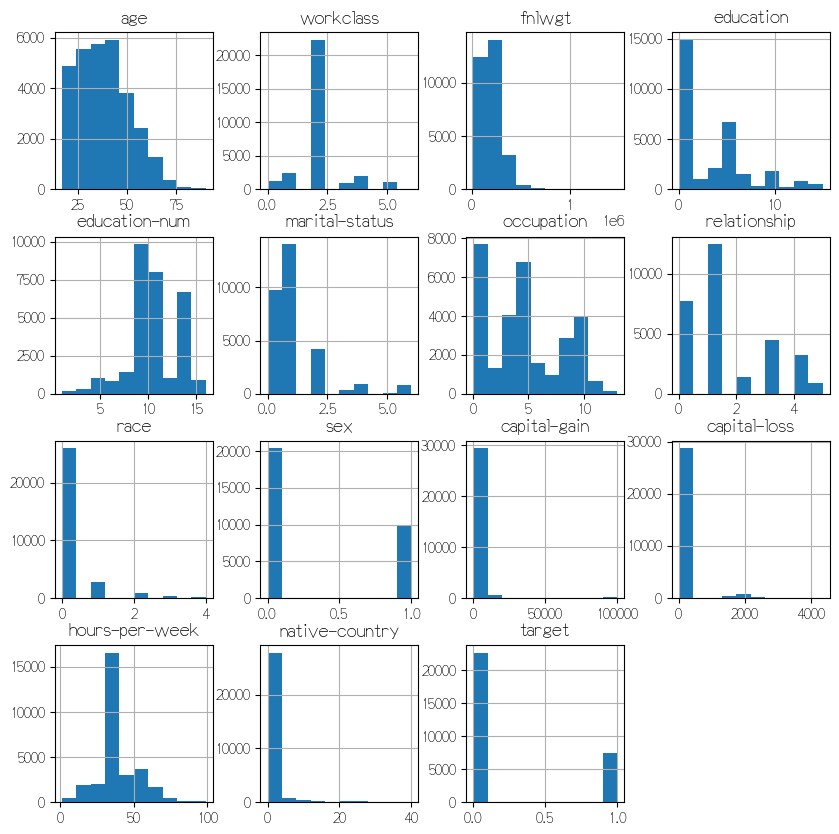

In [10]:
ds.hist(bins=10,figsize=(10,10))

In [31]:
y = ds.target
X = ds.iloc[:, :-1]

In [253]:
print(X)

       age  workclass  fnlwgt  education  education-num  marital-status  \
0       39          0   77516          0             13               0   
1       50          1   83311          0             13               1   
2       38          2  215646          1              9               2   
3       53          2  234721          2              7               1   
4       28          2  338409          0             13               1   
...    ...        ...     ...        ...            ...             ...   
32556   27          2  257302          6             12               1   
32557   40          2  154374          1              9               1   
32558   58          2  151910          1              9               6   
32559   22          2  201490          1              9               0   
32560   52          5  287927          1              9               1   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0               0        

In [32]:
# 描述統計量
ds.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
count,30162.000000,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,2.109343,1.897938e+05,3.424607,10.121312,1.075061,4.615609,1.523971,0.211823,0.324315,1092.007858,88.372489,40.931238,1.183509,0.248922
std,13.134665,0.934785,1.056530e+05,3.479777,2.549995,1.217557,3.432195,1.431980,0.612461,0.468126,7406.346497,404.298370,11.979984,4.947070,0.432396
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176272e+05,1.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,2.000000,1.784250e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,47.000000,2.000000,2.376285e+05,5.000000,13.000000,1.000000,8.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,6.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


<Axes: >

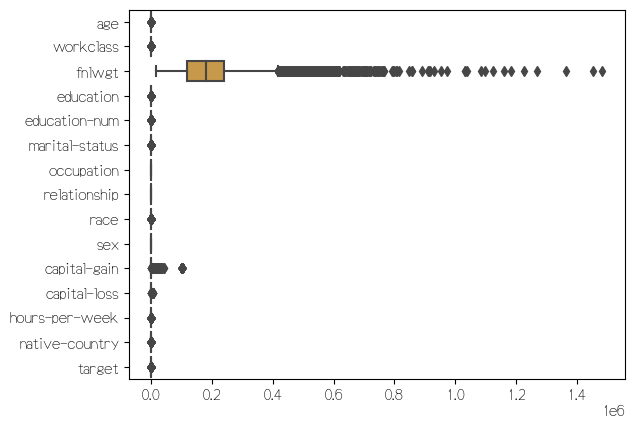

In [34]:
# 箱型圖
import seaborn as sns
sns.boxplot(data=ds,orient='h')

In [35]:
# 是否有含遺失值(Missing value)
ds.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

## 繪圖

<Axes: xlabel='target', ylabel='count'>

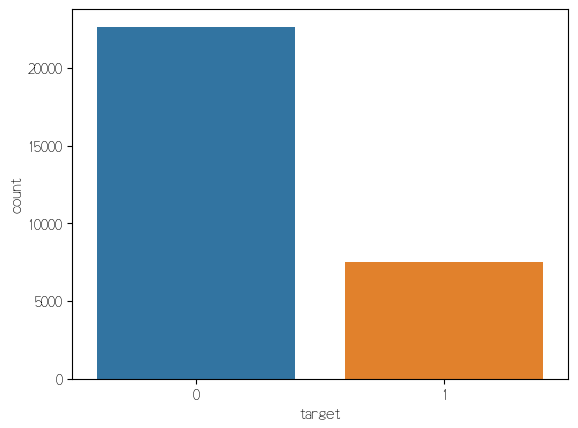

In [36]:
# y 各類別資料筆數統計
import seaborn as sns
sns.countplot(x=y)

In [37]:
# 以Pandas函數統計各類別資料筆數
pd.Series(y).value_counts()

target
0    22654
1     7508
Name: count, dtype: int64

## 3. 不須進行特徵工程

## 4. 資料分割

In [38]:
# 指定X，並轉為 Numpy 陣列
# X = ds.values
X = X.values

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24129, 14), (6033, 14), (24129,), (6033,))

In [39]:
y_train

17254    1
17159    0
32024    1
32012    1
711      0
        ..
40       0
32555    0
20107    0
3584     1
5445     0
Name: target, Length: 24129, dtype: int32

## 特徵縮放

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 5. 選擇演算法

In [41]:
from sklearn.linear_model import LogisticRegression
UCI = LogisticRegression()

## 6. 模型訓練

In [42]:
UCI.fit(X_train_std, y_train)

LogisticRegression()

## 7. 模型評估

In [43]:
y_pred = UCI.predict(X_test_std)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
y_pred = UCI.predict_proba(X_test_std)
y_pred

array([[0.82401344, 0.17598656],
       [0.97290805, 0.02709195],
       [0.24715597, 0.75284403],
       ...,
       [0.89815671, 0.10184329],
       [0.97854586, 0.02145414],
       [0.8385612 , 0.1614388 ]])

In [44]:
# 計算準確率
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

82.08%


In [45]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[4259  264]
 [ 817  693]]


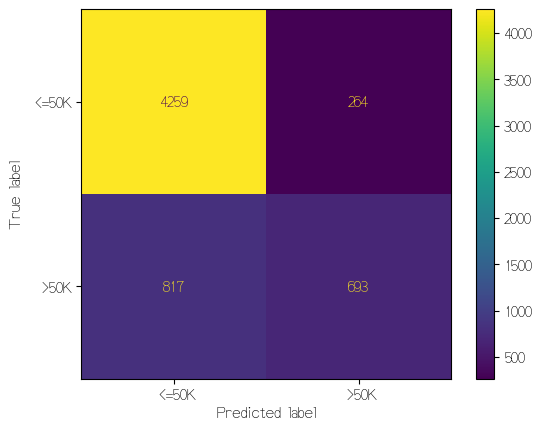

In [46]:
# 混淆矩陣圖
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)
                              , display_labels=target_names)
disp.plot()
plt.show()

## 8. 模型評估，暫不進行

## 9. 模型佈署

In [47]:
# 模型存檔
import joblib

joblib.dump(UCI, 'UCI_model.joblib')
joblib.dump(scaler, 'UCI_scaler.joblib')

['UCI_scaler.joblib']

## 10.模型預測